In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [18]:
df1 = pd.read_csv('../Li_comp/chemical_space/Li_C.csv')
df2 = pd.read_csv('../K_comp/chemical_space/K_C.csv')

df1 = df1[['Result_1','Structure_SG','Anion Site']]
df2 = df2[['Result_1','Structure_SG','Anion Site']]

df1.sort_values(by=['Anion Site','Result_1'], ascending=[True,False], inplace=True)
df2.sort_values(by=['Anion Site','Result_1'], ascending=[True,False], inplace=True)

In [19]:
df1
df2

,Result_1,Structure_SG,Anion Site
0,7.716753,K-C0.25,0.25
6,1.315239,K-C0.5,0.50
2,1.587408,K-C1.0,1.00
3,1.578979,K-C1.0,1.00
4,1.578547,K-C1.0,1.00
5,1.322655,K-C1.0,1.00
1,4.813723,K-C2.0,2.00
7,1.305392,K-C2.0,2.00
8,1.305190,K-C2.0,2.00
9,1.248208,K-C2.0,2.00


In [20]:
# df1['Result_1'] = df1['Result_1'] * 27.2114 / 1000
df2['Result_1'] = df2['Result_1'] * 27.2114 / 1000


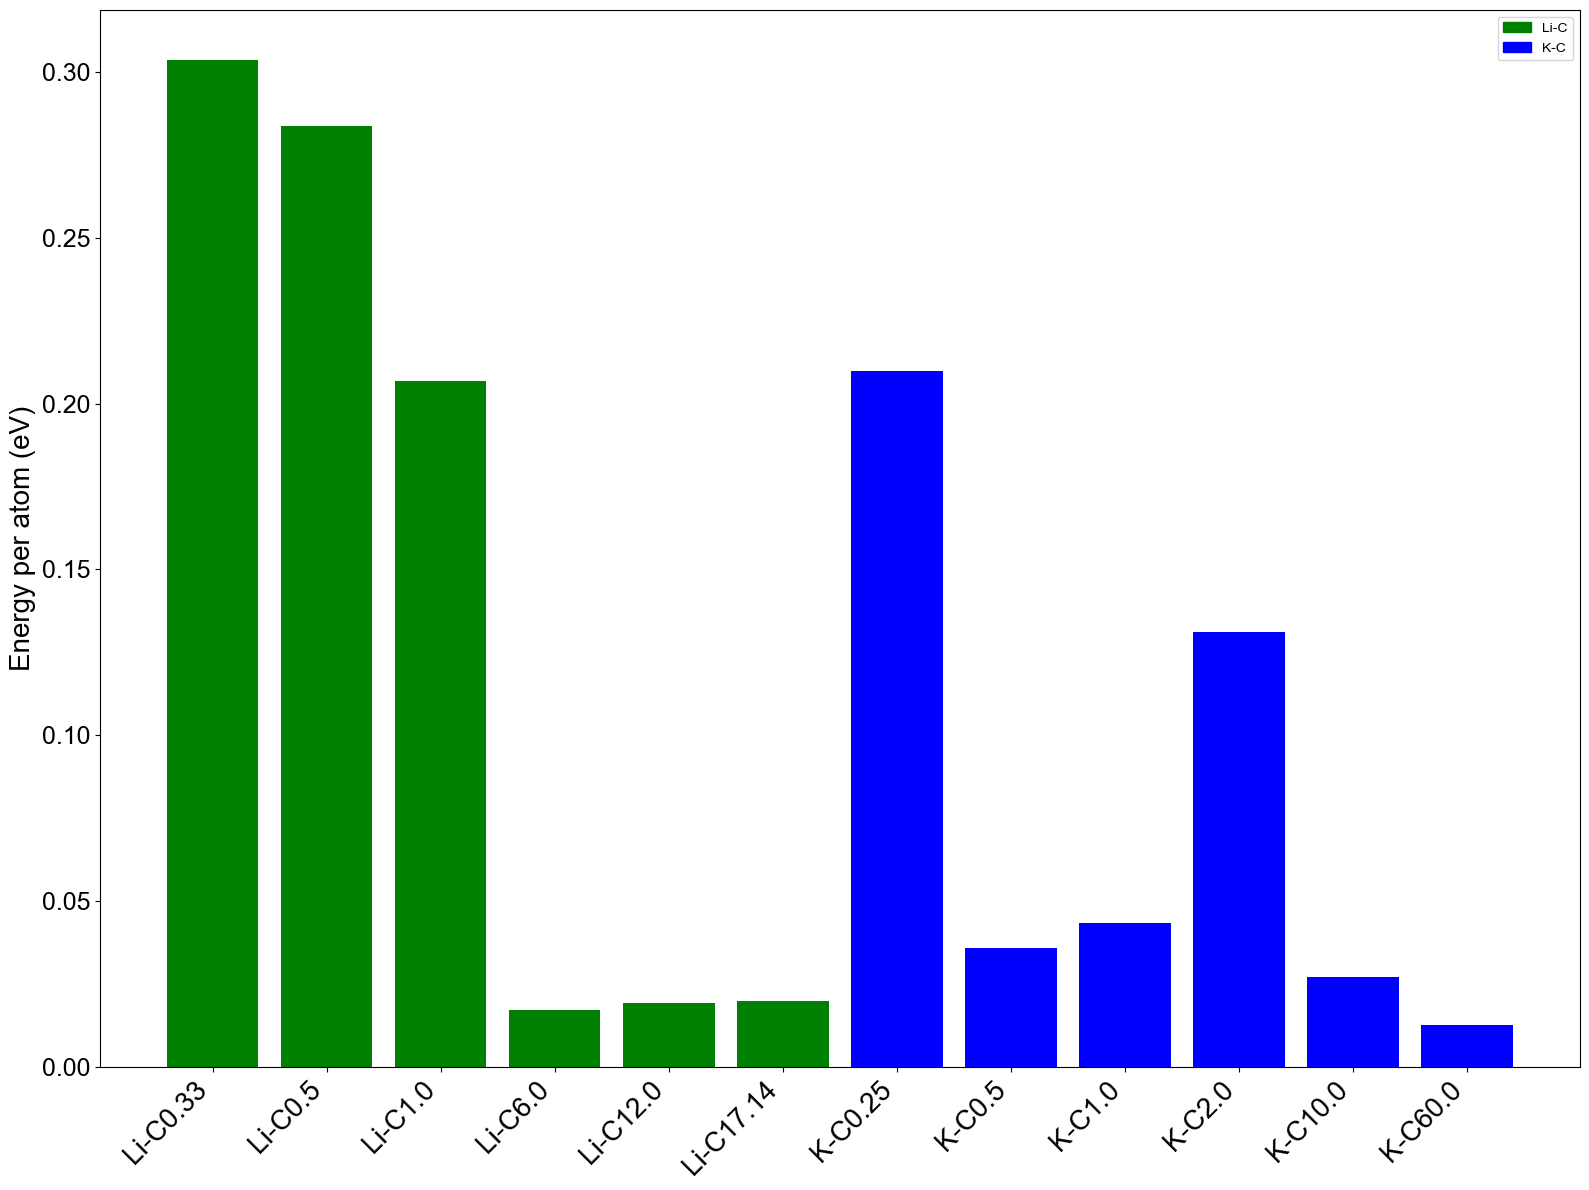

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Label the origin of each DataFrame
df1['Label'] = 'Li-C'
df2['Label'] = 'K-C'

# Combine the DataFrames
df_combined = pd.concat([df1, df2])

# df_combined.sort_values(by=['Anion Site','Result_1'], ascending=[True,False], inplace=True)
# Create a unique label for each structure
df_combined['Structure'] = df_combined['Structure_SG'].astype(str)

# Map colors based on the Label
color_map = {'Li-C': 'green', 'K-C': 'blue'}
colors = df_combined['Label'].map(color_map)

# Plotting
plt.figure(figsize=(16, 12))
plt.bar(df_combined['Structure'], df_combined['Result_1'], color=colors)

plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("Energy per atom (eV)", fontsize=20)

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=color_map[label]) for label in color_map]
labels = list(color_map.keys())
plt.legend(handles, labels)

# plt.savefig('chemical_space/lic_kc.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [22]:
df_combined

,Result_1,Structure_SG,Anion Site,Label,Structure
0,0.303579,Li-C0.33,0.33,Li-C,Li-C0.33
1,0.283825,Li-C0.5,0.50,Li-C,Li-C0.5
2,0.206946,Li-C1.0,1.00,Li-C,Li-C1.0
3,0.017015,Li-C6.0,6.00,Li-C,Li-C6.0
4,0.019151,Li-C12.0,12.00,Li-C,Li-C12.0
5,0.018482,Li-C12.0,12.00,Li-C,Li-C12.0
6,0.019695,Li-C17.14,17.14,Li-C,Li-C17.14
0,0.209984,K-C0.25,0.25,K-C,K-C0.25
6,0.035789,K-C0.5,0.50,K-C,K-C0.5
2,0.043196,K-C1.0,1.00,K-C,K-C1.0


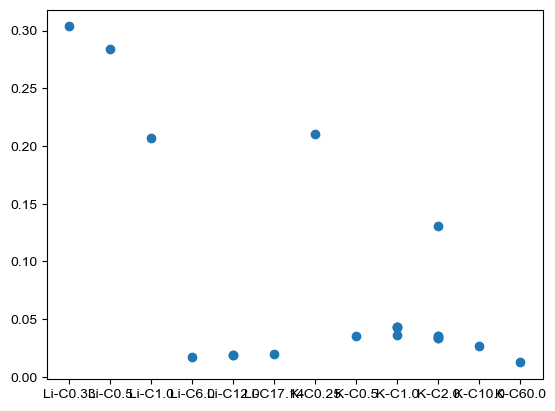

In [23]:
plt.plot(df_combined['Structure'], df_combined['Result_1'], 'o')

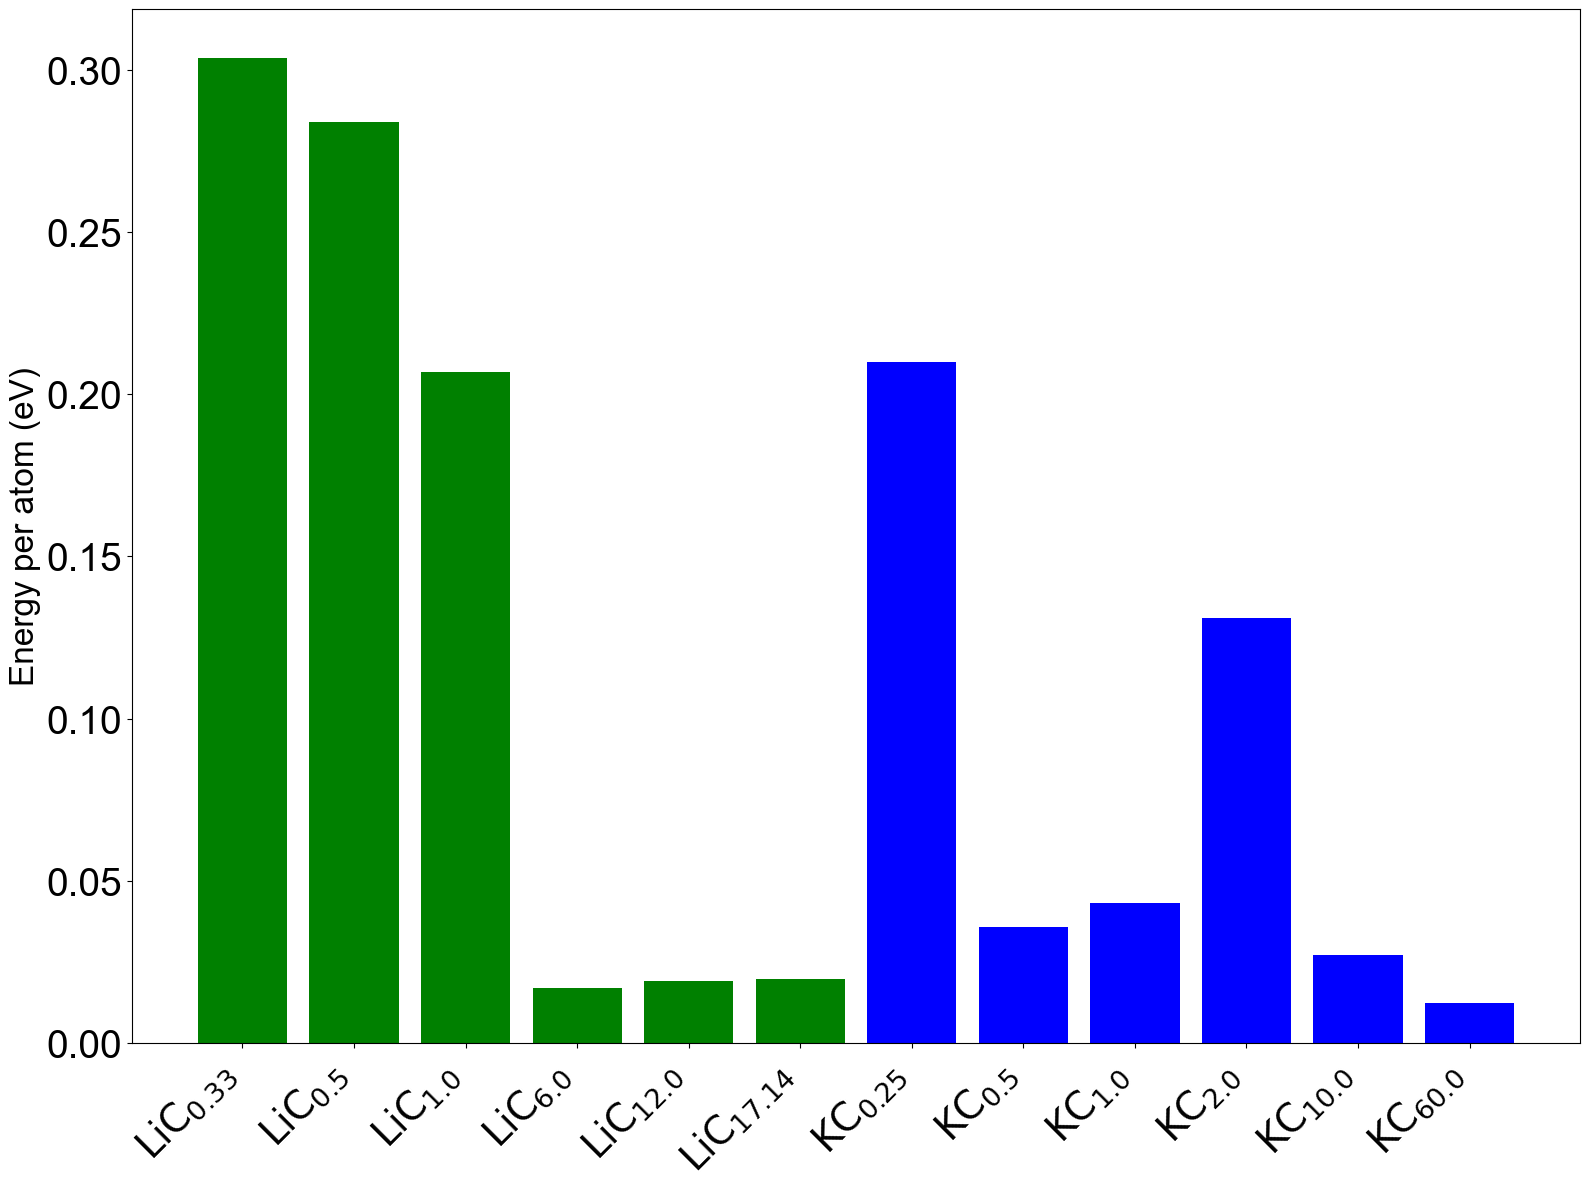

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# --- your existing data load & label logic ---
# df1, df2 already have a column 'Structure_SG' like "Li-C0.33" and a numeric column 'CN'
df1['Label'] = 'Li-C'
df2['Label'] = 'K-C'
df_combined = pd.concat([df1, df2], ignore_index=True)

# create a display string for each bar:
# split the Label on '-' to get the metal symbol, append 'O', subscript the CN
def make_label(row):
    metal = row['Label'].split('-')[0]    # "Li" or "K"
    cn = row['Anion Site']                        # e.g. 0.33
    # use \mathrm{} to keep the letters upright in math mode
    return rf"$\mathrm{{{metal}C}}_{{{cn}}}$"

df_combined['DispLabel'] = df_combined.apply(make_label, axis=1)
plt.rcParams['font.family'] = 'Arial'
# now plot
plt.figure(figsize=(16, 12))
bars = plt.bar(df_combined['DispLabel'], df_combined['Result_1'],color=df_combined['Label'].map({'Li-C':'green','K-C':'blue'}))

# set the ticks to your new labels (they’re already strings with $…$)
plt.xticks(rotation=45, ha='right', fontsize=28)
plt.yticks(fontsize=28)
plt.ylabel("Energy per atom (eV)", fontsize=24)

# legend
handles = [plt.Rectangle((0,0),1,1,color=c) 
           for c in ['green','blue']]
# labels  = ['Li–O','K–O']
# plt.legend(handles, labels)

plt.savefig('chemical_space/lic_kc.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
